In [4]:
import keras
import pandas as pd
import numpy as np 
import itertools

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import tensorflow as tf

In [4]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")
df_top = df[(df["category"] == 3)|(df["category"] == 28)]
df_top.loc[:,"class"] = 0
df_btm = df[(df["category"] == 4)|(df["category"] == 29)]
df_btm.loc[:,"class"] = 1

df_cloth = pd.concat([df_top,df_btm]).reset_index(drop = True)
df_cloth

X = df_cloth[["filename","category"]]
y = pd.DataFrame(df_cloth["class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 5010)

X_train

C:\Users\User\AppData\Local\Temp\ipykernel_14628\3930989819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:,"class"] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_14628\3930989819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btm.loc[:,"class"] = 1


,filename,category
9817,6ed9c2a655d6f84badb557bc210c1fb5.jpg,29
234,293c5038f681f017254800819a968212.jpg,3
8238,90e1e6fbaa0c9a69ad0ee70bc2ea251d.jpg,29
2708,42ea56b9983ba2bf7e01acf5dda172f5.jpg,28
7671,f13b80836fbe7c635a9817e121093594.jpg,4
...,...,...
9880,b61f5b0aec4375090b5a268a1f516ead.jpg,29
2601,5072c6fb5ab3ae57524639805321a0f4.jpg,3
2018,b2afaca110148bc0710f828c9d53b39f.jpg,3
6834,3511390df751f1c8c70ca9c6897ddfc5.jpg,4


In [71]:
X1 = X_train[["filename","category"]]
y1 = pd.DataFrame(y_train["class"])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 5010)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((7275, 2), (1819, 2), (7275, 1), (1819, 1))

In [1]:
import os

train_path1 = "train_dataset"
validation_path1 = "validation_dataset"

len(os.listdir(train_path1 + '/top')), len(os.listdir(train_path1 + '/btm')), len(os.listdir(validation_path1 + '/top')), len(os.listdir(validation_path1 + '/btm'))

(3803, 3472, 957, 862)

In [7]:
IMG_SIZE = (299, 299)
shift = 0.2

training_datagen1 = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=5,
      brightness_range=[0.2,1.5],
      width_shift_range=shift, 
      height_shift_range=shift,
      horizontal_flip=True)
train_set1 = training_datagen1.flow_from_directory(
     train_path1,
     seed=9,
	   target_size=IMG_SIZE,
     class_mode = "categorical")
validation_datagen1 = ImageDataGenerator(
      rescale = 1./255)
val_set1 = validation_datagen1.flow_from_directory(
	  validation_path1,
	  target_size=IMG_SIZE,
    shuffle=False,
    seed=9,
    class_mode = "categorical") 

Found 7275 images belonging to 2 classes.
Found 1819 images belonging to 2 classes.


In [84]:
EPOCHS = 50
INIT_LR = 1e-4
# Model 6 new data

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE+(3,)),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') 
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 144, 144, 64)      51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 72, 72, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 68, 68, 128)       204928    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 34, 34, 128)     

In [8]:
test_path = "test_dataset"

test_datagen = ImageDataGenerator(
      rescale = 1./255)
test_data = test_datagen.flow_from_directory(
	  test_path,
	  target_size=IMG_SIZE,
        shuffle=False,
        seed=9,
        class_mode = "categorical") 

Found 1011 images belonging to 2 classes.


In [61]:
train_preds = np.round(model.predict(train_set1),0)
preds = np.round(model.predict(test_data),0)
print("rounded test labels", preds)

rounded test labels [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [18]:
# get the class labels for the training data, in the original order 
train_labels = train_set1.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=2)    

# get the class labels for the training data, in the original order 
test_labels = test_data.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=2)

test_data.class_indices

{'btm': 0, 'top': 1}

In [5]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option

   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 


In [108]:
BATCH_SIZE = 32
SPLITS = 5

skf = StratifiedKFold(n_splits = SPLITS, random_state = 7, shuffle = True)
df_cloth["class"] = df_cloth["class"].astype("str")
df_cloth["category"] = df_cloth["category"].astype("str")
df_cloth["category"] = df_cloth["category"].apply(lambda r: "0" + r if len(r) == 1 else r)
df_cloth["filepath"] = df_cloth["category"] + '/' + df_cloth["filename"]

X = df_cloth
Y = df_cloth[["class"]]

skf_model_list = [0]*SPLITS

training_datagen_skf = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=5,
      brightness_range=[0.2,1.5],
      width_shift_range=shift, 
      height_shift_range=shift,
      horizontal_flip=True)
count = 0
for train_index, test_index in skf.split(X, Y):
      training_data = X.iloc[train_index]
      validation_data = X.iloc[test_index]

      train_iterator = training_datagen_skf.flow_from_dataframe(training_data,
                                                        x_col='filepath',
                                                        y_col='class',
                                                        directory='./train',
                                                        target_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical',
                                                        shuffle=True)

      validation_iterator = training_datagen_skf.flow_from_dataframe(validation_data,
                                                x_col='filepath',
                                                y_col='class',
                                                directory='./train',
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True)
      print(f"Model {count}")

      skf_model_list[count] = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE+(3,)),
            tf.keras.layers.MaxPooling2D(2, 2), 
            tf.keras.layers.Conv2D(64, (5,5), activation='relu'), 
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(2, activation='softmax') 
            ])
      skf_model_list[count].compile(
            optimizer= tf.keras.optimizers.Adam(
            learning_rate=INIT_LR, 
            decay=INIT_LR / EPOCHS),
            loss=keras.losses.categorical_crossentropy,
            metrics=["accuracy"]
            )
      H1 = skf_model_list[count].fit(
            train_iterator, 
            epochs=20, 
            validation_data=validation_iterator)

      count += 1
print(f"Finished training Model {j}")

Found 8084 validated image filenames belonging to 2 classes.
Found 2021 validated image filenames belonging to 2 classes.
Model 0
Epoch 1/20
253/253 [==============================] - 599s 2s/step - loss: 0.5949 - accuracy: 0.6841 - val_loss: 0.5237 - val_accuracy: 0.7536
Epoch 2/20
253/253 [==============================] - 588s 2s/step - loss: 0.4665 - accuracy: 0.7887 - val_loss: 0.4562 - val_accuracy: 0.7956
Epoch 3/20
253/253 [==============================] - 583s 2s/step - loss: 0.4139 - accuracy: 0.8147 - val_loss: 0.3930 - val_accuracy: 0.8248
Epoch 4/20
253/253 [==============================] - 582s 2s/step - loss: 0.3777 - accuracy: 0.8347 - val_loss: 0.3877 - val_accuracy: 0.8337
Epoch 5/20
253/253 [==============================] - 590s 2s/step - loss: 0.3616 - accuracy: 0.8439 - val_loss: 0.3656 - val_accuracy: 0.8422
Epoch 6/20
253/253 [==============================] - 585s 2s/step - loss: 0.3424 - accuracy: 0.8535 - val_loss: 0.3488 - val_accuracy: 0.8516
Epoch 7/20
2

In [109]:
for j in range(SPLITS):
    fpath = f"skf_{j}.h5"
    skf_model_list[j].save(fpath)

In [38]:
classificationlabels = ['btm','top']
SPLITS = 5

skf_model_list = [0]*SPLITS
for j in range(SPLITS):
    skf_model_list[j] = keras.models.load_model(f'skf_{j}.h5')

results1 = np.zeros( (X_test.shape[0],2) ) 
for j in range(SPLITS):
    results1 = results1 + skf_model_list[j].predict(test_data)

results1 = np.round(results1,0)

final_results1 = np.zeros( (X_test.shape[0],2) )
final_results1[np.arange(results1.shape[0]),np.argmin(results1, axis = 1)] = 1

classificationlabels = ['top','btm']
classification_metrics = metrics.classification_report(test_labels, final_results1, target_names=classificationlabels)

print(classification_metrics)

              precision    recall  f1-score   support

         top       0.97      0.90      0.93       507
         btm       0.90      0.98      0.94       504

   micro avg       0.94      0.94      0.94      1011
   macro avg       0.94      0.94      0.94      1011
weighted avg       0.94      0.94      0.94      1011
 samples avg       0.94      0.94      0.94      1011



Confusion matrix, without normalization


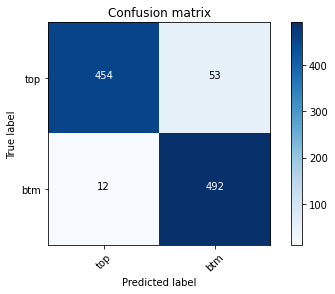

In [56]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds3 = pd.DataFrame(final_results1).idxmax(axis=1)
confusion_matrix4 = confusion_matrix(categorical_test_labels, categorical_preds3)


plot_confusion_matrix(confusion_matrix4, ['top','btm'])